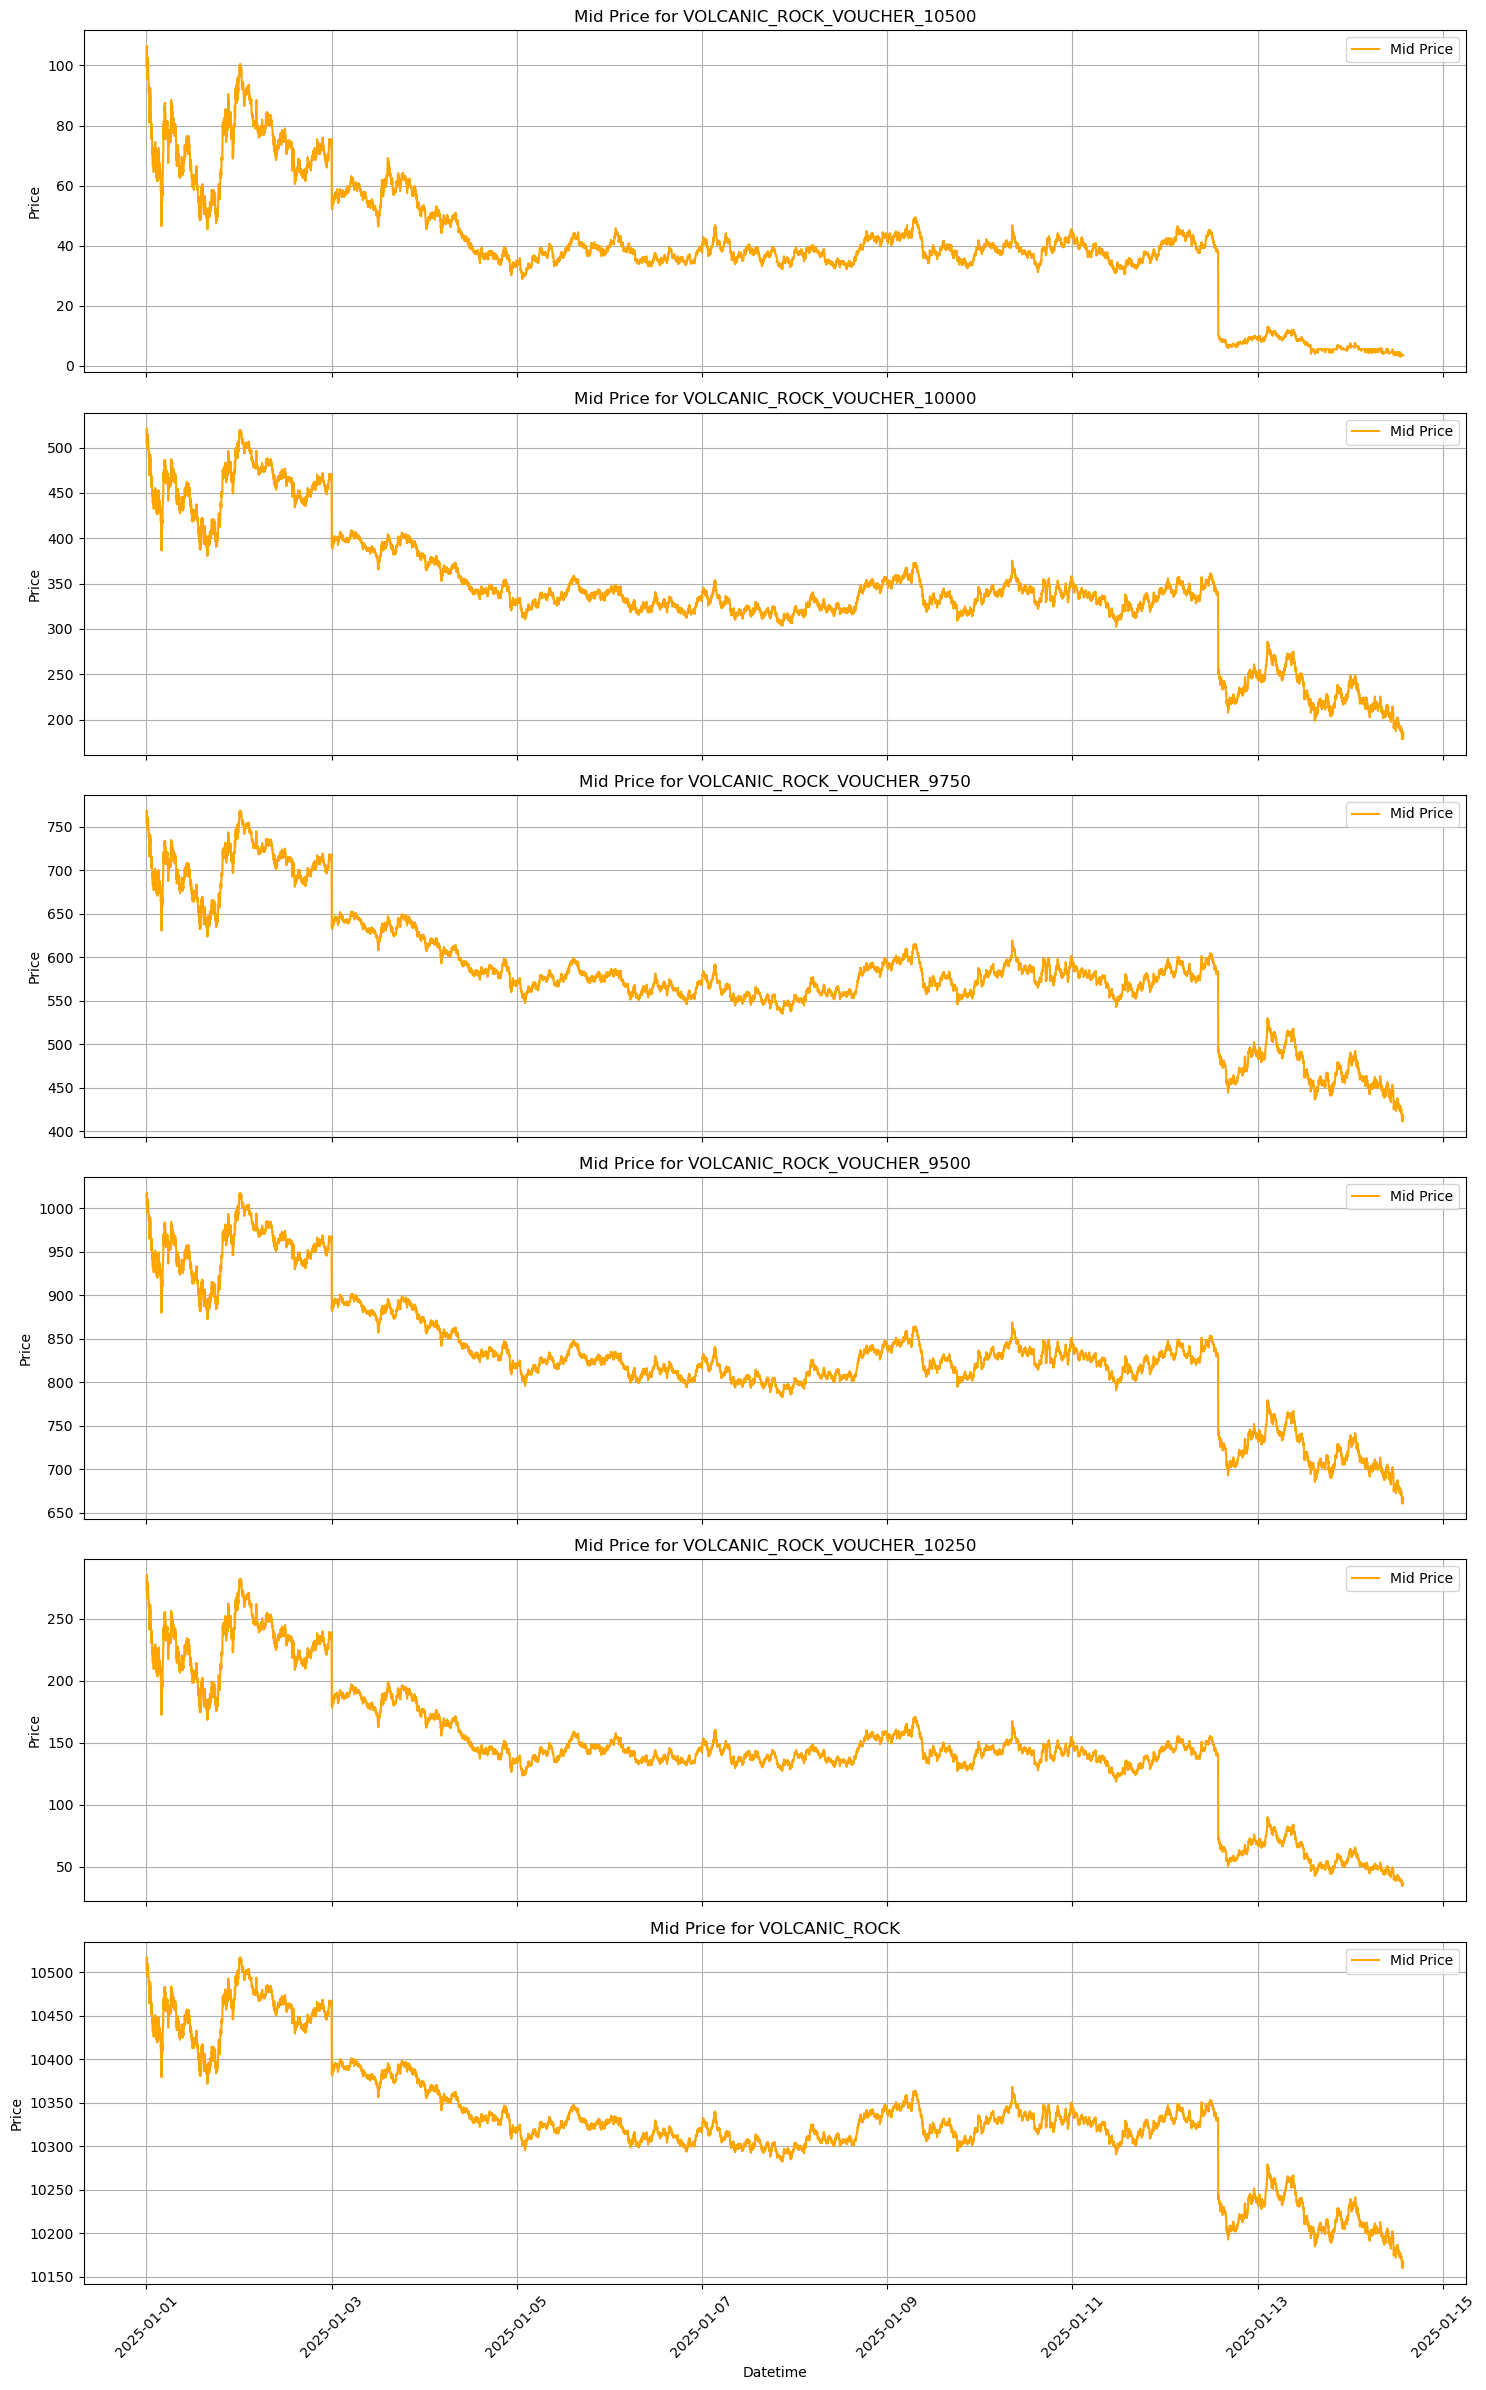

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import timedelta

%matplotlib inline

# Folder path
base_path = r"C:\Users\yashr\Downloads\round-3-island-data-bottle\round-3-island-data-bottle"
days = ['day_0', 'day_1', 'day_2']
files = [f"prices_round_3_{day}.csv" for day in days]

# Base date for timestamps
base_date = pd.to_datetime("2025-01-01")

# Load and adjust timestamps
df_list = []
for i, file in enumerate(files):
    df = pd.read_csv(os.path.join(base_path, file), delimiter=';')
    df.columns = df.columns.str.strip()
    df['timestamp'] = pd.to_timedelta(df['timestamp'], unit='s') + base_date + timedelta(days=i)
    df['day'] = f"day_{i}"
    df_list.append(df)

# Combine all days
combined = pd.concat(df_list, ignore_index=True)

# Filter for VOLCANIC_ROCK products
volcanic_df = combined[combined['product'].str.startswith('VOLCANIC_ROCK')]

# Get unique product names
products = volcanic_df['product'].unique()

# Plot mid prices for each product separately
fig, axes = plt.subplots(len(products), 1, figsize=(15, 4 * len(products)), sharex=True)

# Ensure axes is iterable
if len(products) == 1:
    axes = [axes]

for i, product in enumerate(products):
    df = volcanic_df[volcanic_df['product'] == product]
    
    # Group to ensure no duplicate timestamps
    grouped = df.groupby('timestamp')['mid_price'].mean().reset_index()
    
    ax = axes[i]
    ax.plot(grouped['timestamp'], grouped['mid_price'], label='Mid Price', color='orange')
    ax.set_title(f"Mid Price for {product}")
    ax.set_ylabel("Price")
    ax.grid(True)
    ax.legend()

# Final x-axis label and formatting
axes[-1].set_xlabel("Datetime")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


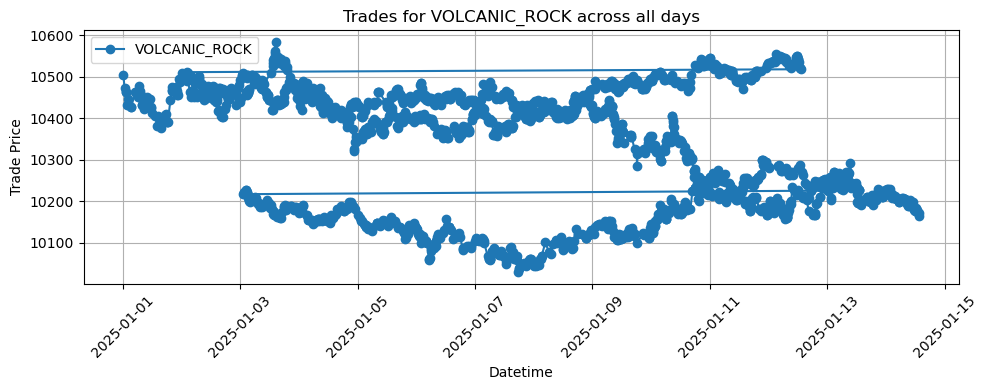

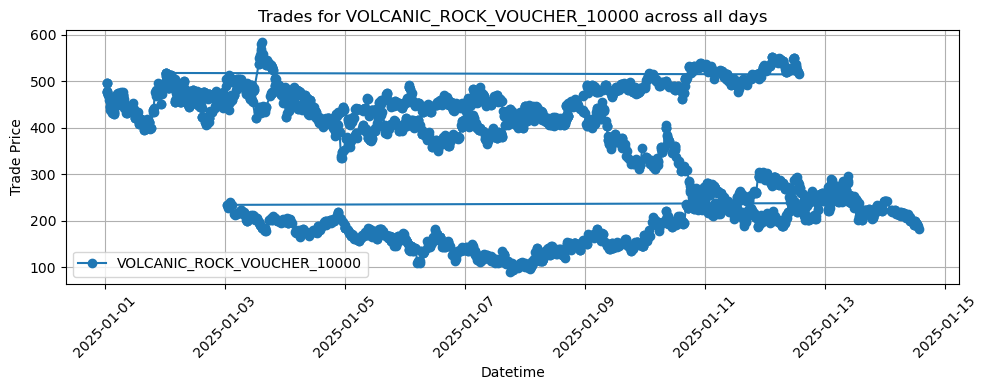

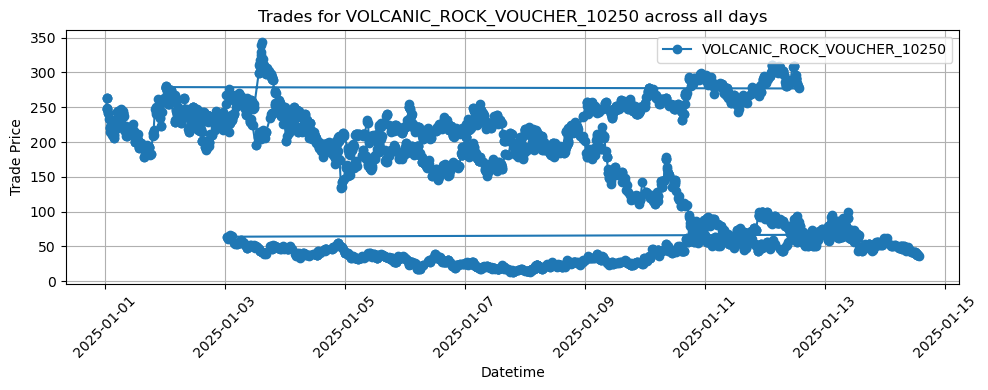

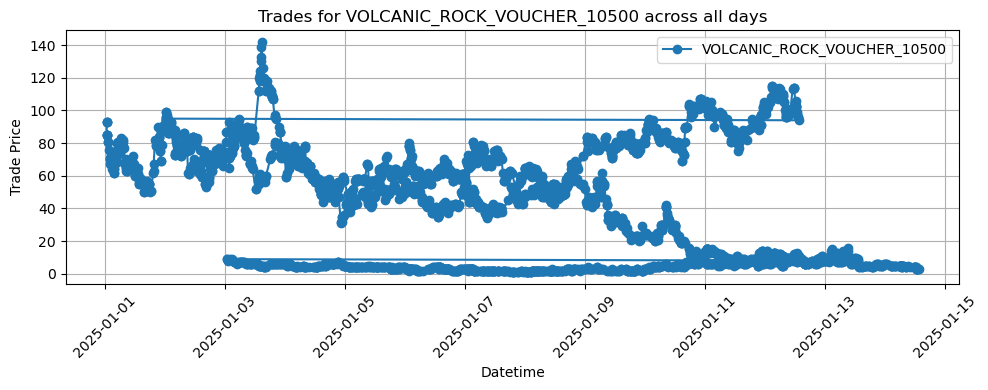

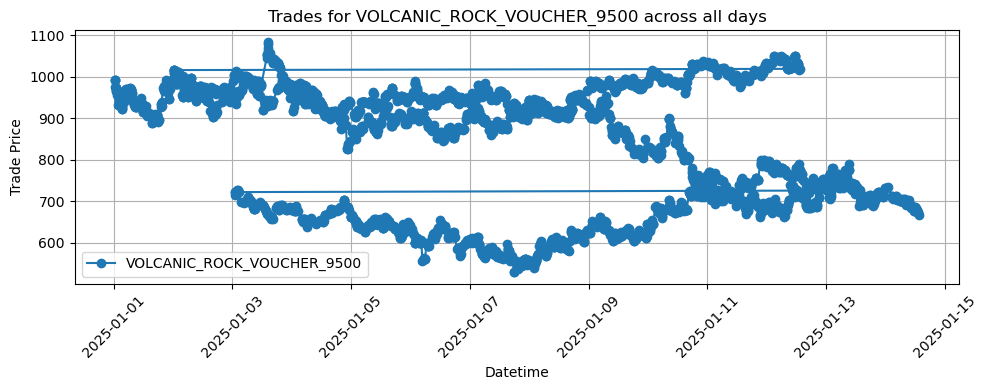

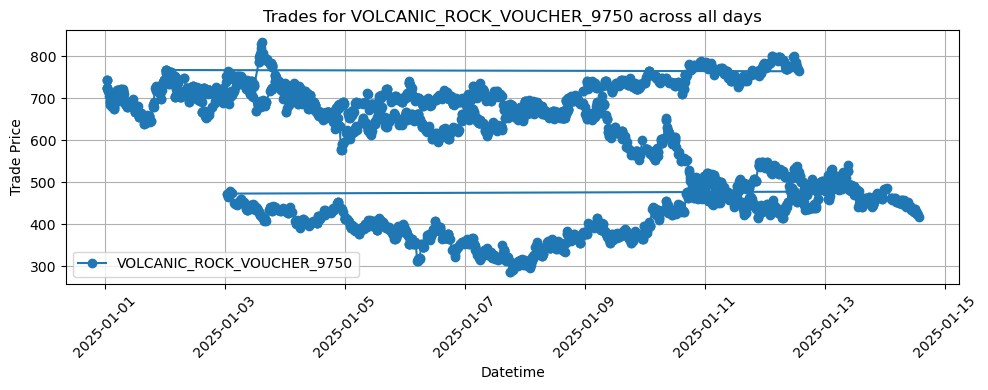

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import timedelta

# Folder where your CSVs are saved
base_path = r"C:\Users\yashr\Downloads\round-3-island-data-bottle\round-3-island-data-bottle"

# Filenames and artificial dates for each day
days = ['day_0', 'day_1', 'day_2']
day_offsets = [0, 1, 2]  # offsets in days
files = [f"trades_round_3_{day}.csv" for day in days]

# Base date (arbitrary, just needs to be consistent)
base_date = pd.to_datetime("2025-01-01")

# Load and combine all CSVs with adjusted timestamps
df_list = []
for offset, file in zip(day_offsets, files):
    file_path = os.path.join(base_path, file)
    df = pd.read_csv(file_path, delimiter=';')
    df.columns = df.columns.str.strip()
    df['timestamp'] = pd.to_timedelta(df['timestamp'], unit='s') + base_date + timedelta(days=offset)
    df['day'] = f"day_{offset}"
    df_list.append(df)

# Combine into one big dataframe
combined_df = pd.concat(df_list, ignore_index=True)

# Filter for volcanic rock vouchers only
voucher_df = combined_df[combined_df['symbol'].str.startswith('VOLCANIC_ROCK')]

# Plot each product individually (merged timeline)
voucher_products = voucher_df['symbol'].unique()
for product in voucher_products:
    product_df = voucher_df[voucher_df['symbol'] == product]
    plt.figure(figsize=(10, 4))
    plt.plot(product_df['timestamp'], product_df['price'], marker='o', linestyle='-', label=product)
    plt.title(f'Trades for {product} across all days')
    plt.xlabel('Datetime')
    plt.ylabel('Trade Price')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()
